In [1]:
import nltk
import string
from tqdm import tqdm
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Activation
from nltk.corpus import stopwords
#from wordcloud import WordCloud ,STOPWORDS

In [2]:
import sys
print(sys.executable)

C:\Users\Kazungu\Anaconda3\python.exe


In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.shape

(23268, 3)

In [4]:
data.head()

,id,content,category
0,SW4670,"Bodi ya Utalii Tanzania (TTB) imesema, itafan...",uchumi
1,SW30826,"PENDO FUNDISHA-MBEYA RAIS Dk. John Magufuri, ...",kitaifa
2,SW29725,Mwandishi Wetu -Singida BENKI ya NMB imetoa ms...,uchumi
3,SW20901,"TIMU ya taifa ya Tanzania, Serengeti Boys jan...",michezo
4,SW12560,Na AGATHA CHARLES – DAR ES SALAAM ALIYEKUWA K...,kitaifa


In [5]:
data["category"].unique()

array(['uchumi', 'kitaifa', 'michezo', 'kimataifa', 'burudani', 'afya'],
      dtype=object)

In [6]:
class_mapping = {
    
    'uchumi':0, 'kitaifa':1, 'michezo':2, 'kimataifa':3, 'burudani':4, 'afya':5
}
data["category_encoded"] = data.category.map(class_mapping)

In [7]:
data.head()

,id,content,category,category_encoded
0,SW4670,"Bodi ya Utalii Tanzania (TTB) imesema, itafan...",uchumi,0
1,SW30826,"PENDO FUNDISHA-MBEYA RAIS Dk. John Magufuri, ...",kitaifa,1
2,SW29725,Mwandishi Wetu -Singida BENKI ya NMB imetoa ms...,uchumi,0
3,SW20901,"TIMU ya taifa ya Tanzania, Serengeti Boys jan...",michezo,2
4,SW12560,Na AGATHA CHARLES – DAR ES SALAAM ALIYEKUWA K...,kitaifa,1


In [8]:
def create_wordcloud(words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

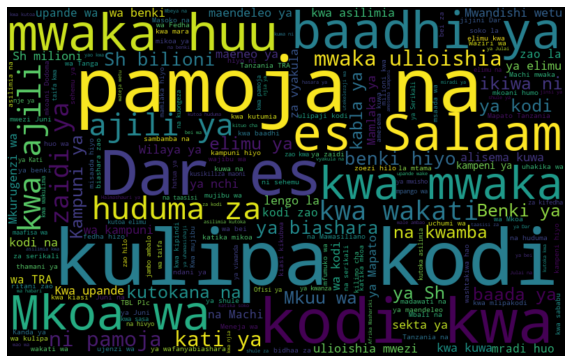

In [10]:
import nltk
import pickle
# from wordcloud import WordCloud
from nltk.corpus import stopwords
from wordcloud import WordCloud ,STOPWORDS
subset=data[data.category=="uchumi"]
text=subset.content.values
words =" ".join(text)
create_wordcloud(words)

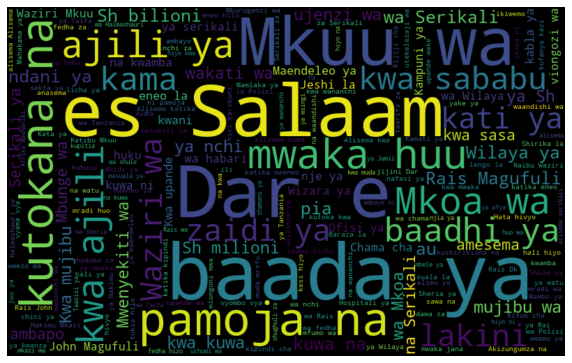

In [11]:
subset=data[data.category=="kitaifa"]
text=subset.content.values
words =" ".join(text)
create_wordcloud(words)

In [12]:
# subset=data[data.category=="michezo"]
# text=subset.content.values
# words =" ".join(text)
# create_wordcloud(words)

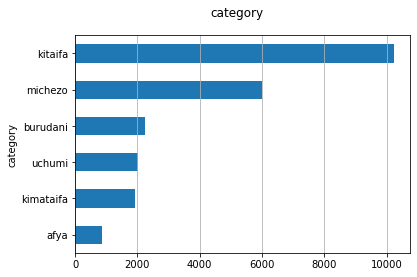

In [15]:
x = "category"
fig, ax = plt.subplots()
fig.suptitle(x, fontsize=12)
data[x].reset_index().groupby(x).count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
# plt.style('')
plt.show()

In [13]:
# subset=data[data.category=="afya"]
# text=subset.content.values
# words =" ".join(text)
# create_wordcloud(words)

In [14]:
# subset=data[data.category=="burudani"]
# text=subset.content.values
# words =" ".join(text)
# create_wordcloud(words)

In [15]:
# subset=data[data.category=="kimataifa"]
# text=subset.content.values
# words =" ".join(text)
# create_wordcloud(words)

In [16]:
# subset=data[data.category=="uchumi"]
# text=subset.content.values
# words =" ".join(text)
# create_wordcloud(words)

In [17]:
def preprocessing(text):
    clean_txt = []
    for i in tqdm(text):
        txt = " ".join("".join([" " if ch in string.punctuation else ch for ch in i]).split())
        tokens = [word for word in txt.split()]
        tokens = [word.lower() for word in tokens]
        tokens = [word for word in tokens if len(word)>=3]
        pre_proc_text = " ".join([token for token in tokens])
        clean_txt.append(pre_proc_text)
    
    return clean_txt

In [18]:
X = preprocessing(data["content"])
y = data["category_encoded"]

100%|██████████| 23268/23268 [00:16<00:00, 1424.59it/s]


In [19]:
# y to categorical
y = to_categorical(y, num_classes=len(set(y)))

In [20]:
temp = pd.DataFrame({"content":X, "category":data.category})

In [21]:
temp.head()

,content,category
0,bodi utalii tanzania ttb imesema itafanya misa...,uchumi
1,pendo fundisha mbeya rais john magufuri ametan...,kitaifa
2,mwandishi wetu singida benki nmb imetoa msaada...,uchumi
3,timu taifa tanzania serengeti boys jana ilijiw...,michezo
4,agatha charles dar salaam aliyekuwa katibu bun...,kitaifa


In [22]:
# subset=temp[temp.category=="kitaifa"]
# text=subset.content.values
# words =" ".join(text)
# create_wordcloud(words)

In [23]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [24]:
X_train.shape, X_train.shape, y_test.shape, y_test.shape

((18614,), (18614,), (4654, 6), (4654, 6))

In [25]:
y_train[:1]

array([[0., 0., 1., 0., 0., 0.]], dtype=float32)

## Feature extraction

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=2, ngram_range=(1, 2), max_features=10000, strip_accents='unicode', norm='l2')
# Fit and transform trainining data
X_train_features = np.array(vectorizer.fit_transform(X_train).todense())
# Transform testing data
X_test_features = np.array(vectorizer.transform(X_test).todense())

In [27]:
import pickle
pickle_out = open("vectorizer.pickle", "wb")
pickle.dump(vectorizer, pickle_out)
pickle_out.close()

In [28]:
np.random.seed(2018) # for reproducibility
nb_classes = 6
batch_size = 64
nb_epochs = 20

In [29]:
X_train_features[:1]

array([[0., 0., 0., ..., 0., 0., 0.]])

In [30]:
# Build Model Architecture
model = Sequential()
model.add(Dense(256, input_shape = (10000,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))


In [31]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2560256   
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               6

In [33]:
model.fit(X_train_features, y_train, batch_size=batch_size, epochs=nb_epochs, verbose=1)

Epoch 1/20
291/291 [==============================] - 45s 50ms/step - loss: 0.6525 - accuracy: 0.79090s - loss: 0.6570 - accuracy: 0. - ETA: 0s - loss: 0.6531 - accuracy
Epoch 2/20
291/291 [==============================] - 13s 43ms/step - loss: 0.3227 - accuracy: 0.8977
Epoch 3/20
291/291 [==============================] - 12s 40ms/step - loss: 0.2269 - accuracy: 0.9281
Epoch 4/20
291/291 [==============================] - 12s 43ms/step - loss: 0.1602 - accuracy: 0.9492
Epoch 5/20
291/291 [==============================] - 13s 44ms/step - loss: 0.1160 - accuracy: 0.9626
Epoch 6/20
291/291 [==============================] - 15s 53ms/step - loss: 0.0970 - accuracy: 0.9700
Epoch 7/20
291/291 [==============================] - 14s 47ms/step - loss: 0.0817 - accuracy: 0.9759
Epoch 8/20
291/291 [==============================] - 13s 44ms/step - loss: 0.0671 - accuracy: 0.9785
Epoch 9/20
291/291 [==============================] - 13s 46ms/step - loss: 0.0657 - accuracy: 0.9800
Epoch 10/20
29

In [34]:
X_train_features.shape

(18614, 10000)

In [35]:
test_pred = model.predict(X_test_features)

In [36]:
test_pred = np.argmax(test_pred, axis=-1)

In [37]:
test_pred

array([1, 1, 1, ..., 1, 1, 4], dtype=int64)

In [38]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(test_pred, np.argmax(y_test, axis=-1)))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       435
           1       0.88      0.88      0.88      2046
           2       0.95      0.95      0.95      1228
           3       0.82      0.87      0.84       349
           4       0.90      0.84      0.87       476
           5       0.34      0.47      0.40       120

    accuracy                           0.87      4654
   macro avg       0.78      0.79      0.78      4654
weighted avg       0.87      0.87      0.87      4654



In [40]:
np.argmax(y_test, axis=-1)

array([1, 0, 2, ..., 1, 1, 4], dtype=int64)

In [41]:
test_pred

array([1, 1, 1, ..., 1, 1, 4], dtype=int64)

In [42]:
model.save("swahili.h5")


In [43]:
from keras.models import load_model

In [44]:
hypothesis = load_model("swahili.h5")

In [45]:
hypothesis.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2560256   
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               6

In [46]:
test = " ni 26 mwaka huu.Misafara hiyo itatembelea miji ya Beijing Juni 19, Shanghai Juni 21, Nanjig Juni 24 na Changsha Juni 26.Mwenyekiti wa bodi TTB, Jaji Mstaafu Thomas Mihayo ameyasema hayo kwenye mkutano na waandishi wa habari jijini Dar es Salaam.â€œTunafanya jitihada kuhakikisha tunavuna watalii wengi zaidi kutoka China hasa tukizingatia umuhimu wa soko la sekta ya utalii nchini,â€ amesema Jaji Mihayo.Novemba 2018 TTB ilifanya ziara kwenye miji ya Beijing, Shanghai, Chengdu, Guangzhou na Hong Kong kutangaza vivutio vya utalii sanjari kuzitangaza safari za ndege za Air Tanzania.Ziara hiyo inaelezwa kuzaa matunda ikiwa ni pamoja na watalii zaidi ya 300 kuja nchini Mei mwaka huu kutembelea vivutio vya utalii."
# test=' Akizungumza mara baada ya kutiwa saini kwa makubaliano hayo jana jioni Waziri wa Nchi Ofisi ya Waziri Mkuu Tawala za Mikoa na Serikali za Mitaa, Hawa Ghasia, alisema uwekezaji huo unatarajiwa kuleta manufaa kwa shirika hilo kwani uwekezaji wake pia utasaidia kutoa elimu kwa vitendo juu ya ufugaji kwa kada mbalimbali.Alisema miaka ya nyuma shirika hilo lilikuwa likisifika kwa ufugaji wa kuku kabla ya kusitisha shughuli hizo kutokana na uwepo wa sababu mbalimbali na kusababisha shirika hilo kukosa mapato yaliyokuwa yakitokana na uuzaji wa kuku na mayai.Mkurugenzi wa Shirika la Elimu Kibaha, Cyprian Mpemba alisema uwekezaji huo wa miaka 66, mbali na kuingizia shirika hilo kiasi cha Sh milioni 100 kila mwaka, pia utawawezesha kuvuna kiasi kingine kama hicho kama ada ya uingiaji katika eneo hilo.Alisema itachukua muda wa miaka nane hadi uwekezaji rasmi ukamilike katika eneo hilo ukihusisha idara mbalimbali ikiwemo ujenzi wa viwanda vya usindikaji wa nyama na utengenezaji wa soseji, huku kila baada ya miaka miwili wakikamilisha ujenzi wa eneo yakiwemo maeneo ya kufugia kuku hao.Mpemba alisema matarajio baada ya mika miwili ijayo mradi huo utaweza kuzalisha kuku milioni 2.7 huku wakitoa ajira kwa watu 120 na ukikamilika utazalisha kuku milioni 165 pamoja na kutoa ajira kwa watu 700 hatua aliyosema itasaidia kuleta mapinduzi katika ufugaji wa kuku hapa nchini sambamba na kutoa elimu kwa wanafunzi kutoka vyuo mbalimbali.Naye Mtendaji Mkuu wa kampuni hiyo Hesham Ewies alisema malengo yao ni kuibadilisha Kibaha kwa muda mfupi kwa kulifanya kuwa eneo linalosifika kutokana na shughuli za ufugaji wa kuku huku zaidi wakilenga kuondoa upungufu wa mahitaji ya bidhaa ya kuku yaliyopo kwa sasa nchini.Alisema watarajio yao baada ya miaka michache ijayo, Tanzania itaweza kusifika kwa usafirishaji wa bidhaa zitokanazo na kuku kwenda nje ya nchi na hivyo kuliongeza Taifa mapato.'

In [47]:
def test_pipeline(txt):
    #print(txt)
    text = preprocessing(txt)
    text = " ".join(text)
    #print(text)
    features = np.array(vectorizer.transform([text]).todense())
    return features

In [48]:
tst = test_pipeline(test)

100%|██████████| 716/716 [00:00<00:00, 8739.68it/s]


In [49]:
tst

array([[0., 0., 0., ..., 0., 0., 0.]])

In [50]:
idx2class = dict([(value, key) for key, value in class_mapping.items()])
np.argmax(hypothesis.predict(tst), axis=1)

array([0], dtype=int64)

In [51]:
np.argmax(hypothesis.predict(tst), axis=1)

array([0], dtype=int64)

In [52]:
import pickle
pickle_out = open("model.pickle","wb")
pickle.dump(model, pickle_out)
pickle_out.close()


INFO:tensorflow:Assets written to: ram://c5e16f82-cdbd-44e3-bd35-d6c96d2d74e5/assets


NotFoundError: 